In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils.np_utils import to_categorical
import os
import cv2 #computer vision
import matplotlib.pyplot as plt


## train data 

In [59]:
path1="D:\data set\cnn\CNN dataset\DevanagariHandwrittenCharacterDataset\Train"
cate_1=['character_1_ka' , "character_2_kha", "character_3_ga" , "character_4_gha" , "character_5_kna" , "character_6_cha" , "character_7_chha" ,
     "character_8_ja" ,"character_9_jha" , "character_10_yna", "character_11_taamatar" ,"character_12_thaa" , 'character_13_daa','character_14_dhaa','character_15_adna','character_16_tabala',
     'character_17_tha','character_18_da','character_19_dha','character_20_na','character_21_pa','character_22_pha',
     'character_23_ba','character_24_bha','character_25_ma','character_26_yaw','character_27_ra',
     'character_28_la','character_29_waw','character_30_motosaw','character_31_petchiryakha','character_32_patalosaw',
     'character_33_ha','character_34_chhya','character_35_tra','character_36_gya','digit_0','digit_1','digit_2','digit_3','digit_4','digit_5',
     'digit_6','digit_7','digit_8','digit_9']

In [60]:
image_size_1=50
input_image_train=[]
for i in cate_1:
    folders_1=os.path.join(path1,i)
    label_1=cate_1.index(i)
    for image_1 in os.listdir(folders_1):
        image_path_1=os.path.join(folders_1,image_1)
        image_array_1=cv2.imread(image_path_1)
        image_array_1=cv2.resize(image_array_1,(image_size_1,image_size_1))
        input_image_train.append([image_array_1,label_1])
         

In [61]:
len(input_image_train)

78200

In [62]:
np.random.shuffle(input_image_train)

In [63]:
#input_image_train=input_image_train[0:50000]

In [64]:
train_X=[]
train_Y=[]

for X_values,labels in input_image_train:
    train_X.append(X_values)
    train_Y.append(labels)
    

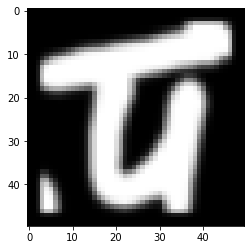

In [65]:
plt.imshow(train_X[90])

In [66]:
len(train_X)

78200

In [67]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)

In [68]:
train_Y

array([43, 37,  4, ..., 40,  0, 35])

In [69]:
train_X=train_X/255
#train_X

## test data cleaning

In [70]:
path2="D:\data set\cnn\CNN dataset\DevanagariHandwrittenCharacterDataset\Test"
cate_2=['character_1_ka' , "character_2_kha", "character_3_ga" , "character_4_gha" , "character_5_kna" , "character_6_cha" , "character_7_chha" ,
     "character_8_ja" ,"character_9_jha" , "character_10_yna", "character_11_taamatar" ,"character_12_thaa" , 'character_13_daa','character_14_dhaa','character_15_adna','character_16_tabala',
     'character_17_tha','character_18_da','character_19_dha','character_20_na','character_21_pa','character_22_pha',
     'character_23_ba','character_24_bha','character_25_ma','character_26_yaw','character_27_ra',
     'character_28_la','character_29_waw','character_30_motosaw','character_31_petchiryakha','character_32_patalosaw',
     'character_33_ha','character_34_chhya','character_35_tra','character_36_gya','digit_0','digit_1','digit_2','digit_3','digit_4','digit_5',
     'digit_6','digit_7','digit_8','digit_9']

In [71]:
image_size_2=50
input_image_test=[]
for i in cate_2:
    folders_2=os.path.join(path2,i)
    label_2=cate_2.index(i)
    for image_2 in os.listdir(folders_2):
        image_path_2=os.path.join(folders_2,image_2)
        image_array_2=cv2.imread(image_path_2)
        image_array_2=cv2.resize(image_array_2,(image_size_2,image_size_2))
        input_image_test.append([image_array_2,label_2])
         

In [72]:
len(input_image_test)

13800

In [73]:
#input_image_test=input_image_test[0:8824]

In [74]:
np.random.shuffle(input_image_test)

In [75]:
test_X=[]
test_Y=[]

for X_values_1,labels_1 in input_image_test:
    test_X.append(X_values_1)
    test_Y.append(labels_1)
    

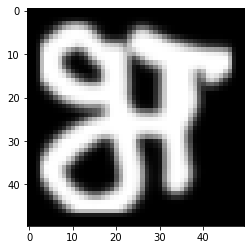

In [76]:
plt.imshow(test_X[95])

In [77]:
len(test_X)

13800

In [78]:
test_X=np.array(test_X)
test_Y=np.array(test_Y)

In [79]:
test_X=test_X/255

### model building

In [80]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils.np_utils import to_categorical


In [81]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu',input_shape=train_X.shape[1:]))
model.add(Dropout(0.20))

model.add(Dense(46,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [82]:
model.fit(train_X,train_Y,epochs=10 ,batch_size=250,validation_split=.20)

Epoch 1/10
251/251 [==============================] - 188s 745ms/step - loss: 0.9143 - accuracy: 0.7465 - val_loss: 0.2258 - val_accuracy: 0.9327
Epoch 2/10
251/251 [==============================] - 189s 754ms/step - loss: 0.2419 - accuracy: 0.9264 - val_loss: 0.1430 - val_accuracy: 0.9568
Epoch 3/10
251/251 [==============================] - 192s 764ms/step - loss: 0.1471 - accuracy: 0.9542 - val_loss: 0.1116 - val_accuracy: 0.9662
Epoch 4/10
251/251 [==============================] - 199s 791ms/step - loss: 0.1024 - accuracy: 0.9669 - val_loss: 0.0996 - val_accuracy: 0.9714
Epoch 5/10
251/251 [==============================] - 196s 780ms/step - loss: 0.0794 - accuracy: 0.9741 - val_loss: 0.0936 - val_accuracy: 0.9724
Epoch 6/10
251/251 [==============================] - 196s 781ms/step - loss: 0.0610 - accuracy: 0.9795 - val_loss: 0.0900 - val_accuracy: 0.9746
Epoch 7/10
251/251 [==============================] - 186s 743ms/step - loss: 0.0517 - accuracy: 0.9828 - val_loss: 0.0949 -

In [83]:
len(train_X)

78200

In [84]:
len(train_Y)

78200

In [85]:
from sklearn.metrics import *

In [86]:
pred_train=model.predict(train_X)
pred_train=np.argmax(pred_train , axis = 1)
pred_train

array([43, 37,  4, ..., 40,  0, 35], dtype=int64)

In [87]:
tab_train=confusion_matrix(train_Y,pred_train)
tab_train

array([[1692,    0,    0, ...,    0,    0,    0],
       [   0, 1686,    0, ...,    0,    0,    0],
       [   0,    0, 1696, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1698,    0,    0],
       [   0,    0,    0, ...,    0, 1697,    0],
       [   0,    0,    0, ...,    0,    0, 1697]], dtype=int64)

In [95]:
acc_train=accuracy_score(train_Y,pred_train)*100
acc_train

99.43478260869566

In [89]:
pred_test=model.predict(test_X)
pred_test=np.argmax(pred_test , axis = 1)
pred_test

array([37, 10, 41, ..., 39, 15, 33], dtype=int64)

In [90]:
tab_test=confusion_matrix(test_Y,pred_test)

In [91]:
print(tab_test)

[[298   0   0 ...   0   0   0]
 [  0 290   0 ...   0   0   0]
 [  0   0 294 ...   0   0   0]
 ...
 [  0   0   0 ... 298   0   0]
 [  0   0   0 ...   0 298   0]
 [  0   0   0 ...   0   1 298]]


In [94]:
acc_test=accuracy_score(test_Y,pred_test)*100
acc_test

97.76811594202898

In [98]:
from keras.models import load_model
from keras.models import save

In [96]:
model.save("devnagari.h5")

In [106]:
dev_load=load_model('devnagari.h5')

In [107]:
t1=dev_load.predict(test_X)
t1=np.argmax(t1,axis=1)

In [108]:
t1

array([37, 10, 41, ..., 39, 15, 33], dtype=int64)

In [109]:
acc_test_load=accuracy_score(test_Y,pred_test)*100
acc_test_load

97.76811594202898

In [110]:
tab_test_load=confusion_matrix(test_Y,pred_test)

In [111]:
tab_test_load

array([[298,   0,   0, ...,   0,   0,   0],
       [  0, 290,   0, ...,   0,   0,   0],
       [  0,   0, 294, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 298,   0,   0],
       [  0,   0,   0, ...,   0, 298,   0],
       [  0,   0,   0, ...,   0,   1, 298]], dtype=int64)